In [1]:
import os
import json
import numpy as np
import rasterio
import matplotlib.pyplot as plt

## Notebook to pad NYWSC K zone rasters so that they're in the right dimensions
Padded K arrays will be used to make k zone multipliers in `0.0_PEST_parameterization.ipynb`

In [2]:
mf6_dir = '../neversink_mf6/'

read in L1_K_Zone_50mGrid.tif just to check out dimension information -- all NYWSC layers have the same dimensions

In [3]:
k_orig = '../source_data/Shapefiles/Layers_and_Zones/K_ZONES/L1_K_Zone_50mGrid.tif'

# load metadata from origianl lith rasters

with rasterio.open(k_orig) as src:
        crs = src.crs
        meta = src.meta
        nodata = meta['nodata']
        K_tuple = src.read(1)
        K_data = K_tuple[0]

In [4]:
#  original dimensions of NYWSC k layers
print('klayer nrow: {}'.format(meta['height']))
print('model ncol: {}'.format(meta['width']))

klayer nrow: 661
model ncol: 599


In [5]:
#  check against model dimensions
with open('../neversink_mf6/neversink_grid.json') as f:
    grid_data = json.load(f)
    print('model nrow: {}'.format(grid_data['nrow']))
    print('model ncol: {}'.format(grid_data['ncol']))

model nrow: 680
model ncol: 619


In [6]:
#  determine adjustments needed
print('need to expand rows by {} cells'.format(grid_data['nrow'] - meta['height']))
print('need to expand columns by {} cells'.format(grid_data['ncol'] - meta['width']))

need to expand rows by 19 cells
need to expand columns by 20 cells


### Loop through rasters, pad, and save padded arrays as `.dat` files

In [7]:
k_orig = '../source_data/Shapefiles/Layers_and_Zones/K_ZONES/L{}_K_Zone_50mGrid.tif'

for i in range(4):
    with rasterio.open(k_orig.format(i+1)) as src:
        K_data = src.read(1)
    
    padded_k = np.pad(K_data, ((9, 10), (15, 5)), 'minimum')

    np.savetxt('../processed_data/padded_L{}_K_Zone_50mGrid.dat'.format(i), padded_k, fmt='%i')

### Check that the new k zone arrays line up with model idomains 
- specifically, make sure that -128 (k zone nodata value) doesn't show up when the k zones are mulitiplied by idomain
- negative values in layers 2 and 3 are from pass through cells and not missing k data (values = -k)

layer 0


C:\ProgramData\Anaconda3\envs\neversink\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\ProgramData\Anaconda3\envs\neversink\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\ProgramData\Anaconda3\envs\neversink\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)


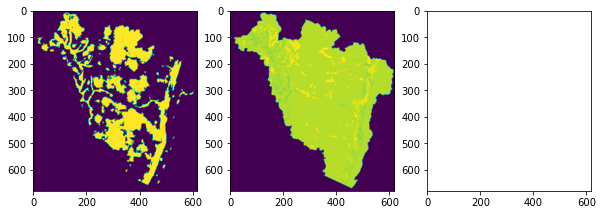

layer 1


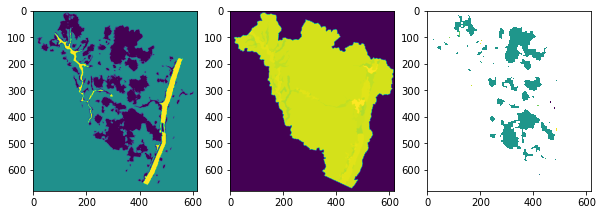

layer 2


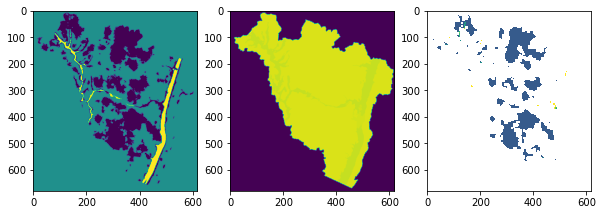

layer 3


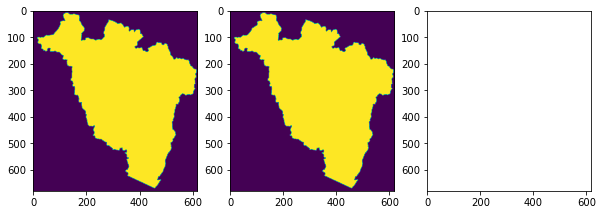

In [8]:
for i in range(4):
    idmn = np.loadtxt('../neversink_mf6/idomain_{:03d}.dat'.format(i))
    k_pad = np.loadtxt('../processed_data/padded_L{}_K_Zone_50mGrid.dat'.format(i))
    
#     print('idmn shape: {}'.format(idmn.shape))
#     print('k_pad shape: {}'.format(k_pad.shape))

    check = idmn * k_pad
    check[check >= 0] = np.nan
    print('layer {}'.format(i))
    
    fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(10,5))
    ax0.imshow(idmn)
    ax1.imshow(k_pad)
    ax2.imshow(check)
    plt.show()

layer 0


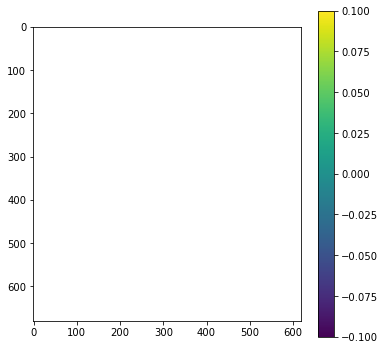

layer 1


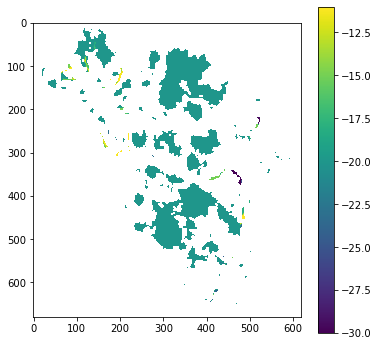

layer 2


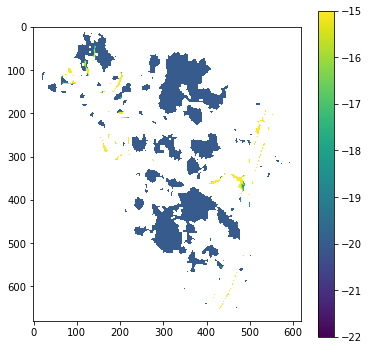

layer 3


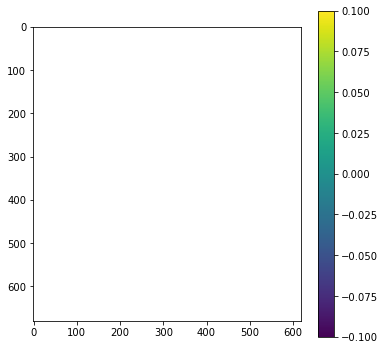

In [9]:
for i in range(4):
    idmn = np.loadtxt('../neversink_mf6/idomain_{:03d}.dat'.format(i))
    k_pad = np.loadtxt('../processed_data/padded_L{}_K_Zone_50mGrid.dat'.format(i))
    
#     print('idmn shape: {}'.format(idmn.shape))
#     print('k_pad shape: {}'.format(k_pad.shape))

    check = idmn * k_pad
    check[check >= 0] = np.nan
    print('layer {}'.format(i))
    
    plt.figure(figsize=(6,6))
    plt.imshow(check)
    plt.colorbar()
    plt.show()